In [83]:
import pandas as pd
import random as random
import datetime
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data


In [2]:
timeval = ['time', 'value']
#files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_starts_compressor1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
#cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'starts_compressor1', 'state', 'extended_state']

files = ['data/heatpump_temperature_1.csv.gz', 'data/heatpump_temperature_2.csv.gz', 'data/heatpump_temperature_3.csv.gz', 'data/heatpump_temperature_4.csv.gz', 'data/heatpump_temperature_5.csv.gz', 'data/heatpump_temperature_6.csv.gz', 'data/heatpump_return_external.csv.gz', 'data/heatpump_hot_gas.csv.gz',  'data/heatpump_probe_in.csv.gz', 'data/heatpump_mk1.csv.gz', 'data/heatpump_state.csv.gz', 'data/heatpump_extended_state.csv.gz']
cols = ['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'state', 'extended_state']

state_converter = lambda x: (sys.intern(x.split(":")[0]))
converters = {'data/heatpump_state.csv.gz': state_converter, 'data/heatpump_extended_state.csv.gz': state_converter}
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2016-01-16'), pd.to_datetime('2020-12-25'),freq='1m')})
#merged_df = pd.DataFrame({'time': pd.date_range(pd.to_datetime('2020-12-20'), pd.to_datetime('2020-12-21'),freq='1m')})
merged_df = pd.DataFrame()

for i, file in enumerate(files):
    print(file)
    with gzip.open(file, "rb") as f:
        df = pd.read_csv(f, sep=';', parse_dates=True, index_col=timeval[0], names=timeval, converters={timeval[1]: converters.get(file)})

    df.info(verbose=False)

    #df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S') # see parse_dates = True above
    df['value'] = pd.SparseArray(df['value'].values) # , dtype=df['value'].dtype)
    df.rename(columns={"value": cols[i]}, inplace=True)

    #df.sort_values('time', inplace=True)
    #df.set_index('time', inplace=True)
  
    #df = df[(df.index > '2020-12-10 12:00:00') & (df.index < '2020-12-10 15:00:00')] # Filter

    print(df)

#    if i == 0:
#        merged_df = df
#    else:
#       merged_df = pd.merge_asof(merged_df.sort_values('time'), df, on='time', tolerance=pd.Timedelta("1m"))
    merged_df = merged_df.merge(df, how='outer', left_index=True, right_index=True)
    #print('df_merged memory usage : {}'.format(merged_df.memory_usage()/1000))

#merged_df.set_index('time', inplace=True)


data/heatpump_temperature_1.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2071709 entries, 2016-01-16 14:35:50 to 2020-12-24 23:05:45
Columns: 1 entries, value to value
dtypes: float64(1)
memory usage: 31.6 MB
                     outside
time                        
2016-01-16 14:35:50     13.8
2016-01-16 14:36:00     13.9
2016-01-16 14:36:50     13.8
2016-01-16 14:37:01     13.9
2016-01-16 14:37:51     13.8
...                      ...
2020-12-24 22:57:30     11.9
2020-12-24 23:03:14     12.0
2020-12-24 23:03:24     11.9
2020-12-24 23:05:35     12.0
2020-12-24 23:05:45     11.9

[2071709 rows x 1 columns]
data/heatpump_temperature_2.csv.gz
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1709698 entries, 2016-01-16 14:36:20 to 2020-12-25 01:04:52
Columns: 1 entries, value to value
dtypes: float64(1)
memory usage: 26.1 MB
                     return
time                       
2016-01-16 14:36:20    28.9
2016-01-16 14:36:30    28.8
2016-01-16 14:36:40    28.9
2016-01

In [3]:

display(merged_df)


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,state,extended_state
time,,,,,,,,,,,,
2016-01-16 14:35:50,13.8,NaN,NaN,34.0,NaN,NaN,NaN,60.9,3.7,NaN,Heatpump running,heating
2016-01-16 14:36:00,13.9,NaN,NaN,34.1,NaN,38.5,NaN,61.0,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:10,NaN,NaN,NaN,34.2,NaN,38.6,NaN,NaN,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:20,NaN,28.9,NaN,NaN,NaN,38.5,NaN,NaN,NaN,NaN,Heatpump running,heating
2016-01-16 14:36:30,NaN,28.8,NaN,34.3,NaN,38.6,NaN,NaN,NaN,NaN,Heatpump running,heating
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:04:22,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,22.1,Heatpump stopped,standby
2020-12-25 01:04:32,NaN,21.5,NaN,21.1,NaN,NaN,NaN,NaN,5.3,22.0,Heatpump stopped,standby
2020-12-25 01:04:42,NaN,NaN,NaN,21.3,NaN,NaN,NaN,NaN,NaN,21.9,Heatpump stopped,standby


In [4]:
#merged_df['compressor_heating'] = merged_df['extended_state'].str.contains('compressor heating up') | merged_df['extended_state'].str.contains('unknown')
#merged_df['defrosting'] = merged_df['extended_state'].str.contains('defrosting')
#merged_df['heatpump_running'] = merged_df['state'].str.contains('Heatpump running')
#merged_df['heatpump_heating'] = merged_df['extended_state'].str.contains('heating')
#merged_df['heatpump_servicewater'] = merged_df['extended_state'].str.contains('service water')
dummies_state = pd.get_dummies(merged_df['state'], sparse=True)
dummies_extended_state = pd.get_dummies(merged_df['extended_state'], sparse=True)
merged_df['compressor_heating'] = dummies_extended_state['compressor heating up'] | dummies_extended_state['unknown']
merged_df['heatpump_heating'] = dummies_extended_state['heating']
merged_df['heatpump_servicewater'] = dummies_extended_state['service water']
merged_df['heatpump_running'] = dummies_state['Heatpump running']
merged_df['defrosting'] = dummies_extended_state['defrosting']
merged_df.drop(columns=['state'], inplace=True)
merged_df.drop(columns=['extended_state'], inplace=True)
merged_df

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,compressor_heating,heatpump_heating,heatpump_servicewater,heatpump_running,defrosting
time,,,,,,,,,,,,,,,
2016-01-16 14:35:50,13.8,NaN,NaN,34.0,NaN,NaN,NaN,60.9,3.7,NaN,0,1,0,1,0
2016-01-16 14:36:00,13.9,NaN,NaN,34.1,NaN,38.5,NaN,61.0,NaN,NaN,0,1,0,1,0
2016-01-16 14:36:10,NaN,NaN,NaN,34.2,NaN,38.6,NaN,NaN,NaN,NaN,0,1,0,1,0
2016-01-16 14:36:20,NaN,28.9,NaN,NaN,NaN,38.5,NaN,NaN,NaN,NaN,0,1,0,1,0
2016-01-16 14:36:30,NaN,28.8,NaN,34.3,NaN,38.6,NaN,NaN,NaN,NaN,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:04:22,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,22.1,0,0,0,0,0
2020-12-25 01:04:32,NaN,21.5,NaN,21.1,NaN,NaN,NaN,NaN,5.3,22.0,0,0,0,0,0
2020-12-25 01:04:42,NaN,NaN,NaN,21.3,NaN,NaN,NaN,NaN,NaN,21.9,0,0,0,0,0


In [5]:
display(merged_df.dtypes)
merged_df.info(verbose=False, memory_usage="deep")

outside                   Sparse[float64, nan]
return                    Sparse[float64, nan]
reference_return          Sparse[float64, nan]
supply                    Sparse[float64, nan]
servicewater_reference    Sparse[float64, nan]
servicewater              Sparse[float64, nan]
return_external           Sparse[float64, nan]
hot_gas                   Sparse[float64, nan]
probe_in                  Sparse[float64, nan]
mk1                       Sparse[float64, nan]
compressor_heating            Sparse[uint8, 0]
heatpump_heating              Sparse[uint8, 0]
heatpump_servicewater         Sparse[uint8, 0]
heatpump_running              Sparse[uint8, 0]
defrosting                    Sparse[uint8, 0]
dtype: object

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16466712 entries, 2016-01-16 14:35:50 to 2020-12-25 01:05:02
Columns: 15 entries, outside to defrosting
dtypes: Sparse[float64, nan](10), Sparse[uint8, 0](5)
memory usage: 307.5 MB


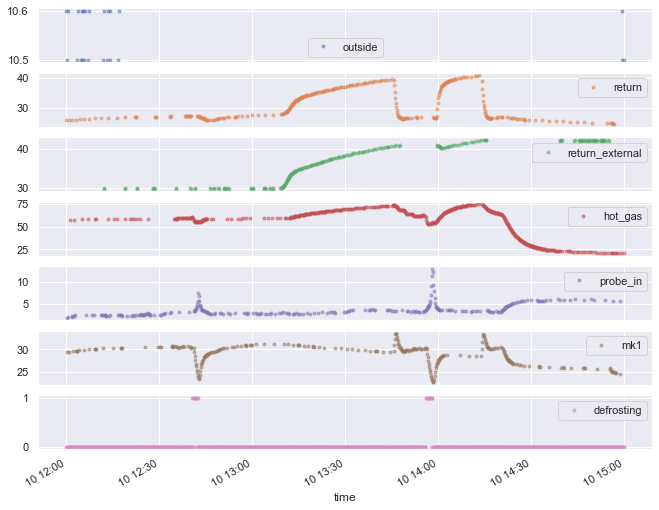

In [6]:

sns.set(rc={'figure.figsize':(20, 8)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = merged_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
#    ax.set_ylabel('Daily Totals (GWh)')


In [7]:
resampled_df = merged_df.sparse.to_dense().ffill().resample('1Min').mean().dropna()
normalized_df=(resampled_df-resampled_df.min())/(resampled_df.max()-resampled_df.min())
display(normalized_df)
normalized_df.info(verbose=False, memory_usage="deep")
display(resampled_df)
resampled_df.info(verbose=False, memory_usage="deep")

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,compressor_heating,heatpump_heating,heatpump_servicewater,heatpump_running,defrosting
time,,,,,,,,,,,,,,,
2016-01-17 15:00:00,0.410628,0.307596,0.465385,0.427390,0.670886,0.534325,0.320755,0.664200,0.167159,0.439122,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:01:00,0.410628,0.307596,0.465385,0.428147,0.670886,0.534325,0.320755,0.664200,0.167159,0.440120,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:02:00,0.410628,0.299318,0.077564,0.434579,0.670886,0.534325,0.321653,0.665159,0.167159,0.440120,0.0,0.166667,0.833333,1.00,0.0
2016-01-17 15:03:00,0.410628,0.243322,0.000000,0.483864,0.670886,0.534325,0.331873,0.671251,0.167159,0.437874,0.0,0.000000,0.750000,0.75,0.0
2016-01-17 15:04:00,0.410628,0.232610,0.000000,0.469013,0.632911,0.534325,0.347709,0.673025,0.165517,0.436128,0.0,0.000000,1.000000,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:01:00,0.342995,0.093072,0.000000,0.146680,0.620253,0.534325,0.539084,0.115113,0.244007,0.113772,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:02:00,0.342995,0.091889,0.000000,0.147004,0.620253,0.534325,0.539084,0.115113,0.242036,0.113772,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:03:00,0.342995,0.091402,0.000000,0.146626,0.620253,0.534325,0.539084,0.115113,0.243678,0.113772,0.0,0.000000,0.000000,0.00,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2565526 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 313.2 MB


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,compressor_heating,heatpump_heating,heatpump_servicewater,heatpump_running,defrosting
time,,,,,,,,,,,,,,,
2016-01-17 15:00:00,13.3,28.700000,27.100000,33.950000,45.0,42.3,29.600000,61.200000,1.600000,32.866667,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:01:00,13.3,28.700000,27.100000,33.983333,45.0,42.3,29.600000,61.200000,1.600000,32.900000,0.0,1.000000,0.000000,1.00,0.0
2016-01-17 15:02:00,13.3,28.416667,17.016667,34.266667,45.0,42.3,29.633333,61.283333,1.600000,32.900000,0.0,0.166667,0.833333,1.00,0.0
2016-01-17 15:03:00,13.3,26.500000,15.000000,36.437500,45.0,42.3,30.012500,61.812500,1.600000,32.825000,0.0,0.000000,0.750000,0.75,0.0
2016-01-17 15:04:00,13.3,26.133333,15.000000,35.783333,43.5,42.3,30.600000,61.966667,1.516667,32.766667,0.0,0.000000,1.000000,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 01:01:00,11.9,21.357143,15.000000,21.585714,43.0,42.3,37.700000,13.500000,5.500000,22.000000,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:02:00,11.9,21.316667,15.000000,21.600000,43.0,42.3,37.700000,13.500000,5.400000,22.000000,0.0,0.000000,0.000000,0.00,0.0
2020-12-25 01:03:00,11.9,21.300000,15.000000,21.583333,43.0,42.3,37.700000,13.500000,5.483333,22.000000,0.0,0.000000,0.000000,0.00,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2565526 entries, 2016-01-17 15:00:00 to 2020-12-25 01:05:00
Columns: 15 entries, outside to defrosting
dtypes: float64(15)
memory usage: 313.2 MB


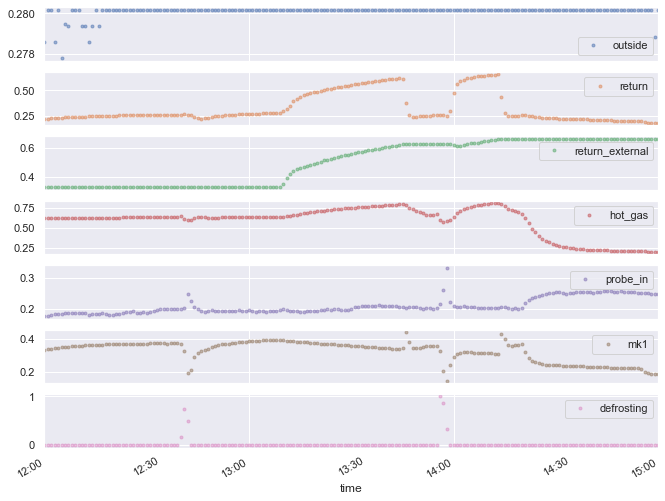

In [8]:

sns.set(rc={'figure.figsize':(20, 8)})

#merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]
df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00']
#df_plot = normalized_df['2020-12-10 12:00:00' : '2020-12-10 15:00:00'] # Great visualization of heating before defrosting

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = df_plot[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

In [9]:
def pp(start, end, n, seed):
    start_u = start.value//10**9
    end_u = end.value//10**9

    # todo: https://numpy.org/doc/stable/reference/random/generator.html?highlight=default_rng#numpy.random.default_rng
    return pd.DatetimeIndex((10**9*np.random.RandomState(seed).randint(start_u, end_u, n, dtype=np.int64)).view('M8[ns]'))


randomstate = np.random.RandomState(42)

def random_datetimes_or_dates(start, end, out_format='datetime', n=10): 

    '''   
    unix timestamp is in ns by default. 
    I divide the unix time value by 10**9 to make it seconds (or 24*60*60*10**9 to make it days).
    The corresponding unit variable is passed to the pd.to_datetime function. 
    Values for the (divide_by, unit) pair to select is defined by the out_format parameter.
    for 1 -> out_format='datetime'
    for 2 -> out_format=anything else
    '''
    (divide_by, unit) = (10**9, 's') if out_format=='datetime' else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pd.to_datetime(randomstate.randint(start_u, end_u, n), unit=unit) 


def overlap_chunks(chunks, start_date, end_date):
    for chunk_df in chunks:
        chunk_start_date = chunk_df.index[0]
        chunk_end_date = chunk_df.index[-1]
        chunk_end_date = chunk_start_date + datetime.timedelta(minutes=30)

        if chunk_start_date < start_date < chunk_end_date:
            return True

        if chunk_start_date < end_date < chunk_end_date:
            return True
    return False


# todo: split_chunks need to be much faster!
def split_chunks(df, min, size):
    min_date = normalized_df.index[0]
    max_date = normalized_df.index[-1]

#    min_date = normalized_df.iloc[0].name
#    max_date = normalized_df.iloc[-1].name
    
    chunks = []
    next_size = size
    while len(chunks) < size:
        dates = random_datetimes_or_dates(min_date, max_date, n=next_size)
        for date in dates:
            end_date = date + datetime.timedelta(minutes=min)

#            if overlap_chunks(chunks, date, end_date):
#                print("!!! Overlapping Date range: {} - {}".format(date, end_date))
#                continue

            chunk_df = df[date : end_date]
            if chunk_df.shape[0] == min:
                print("Date range: {} - {}".format(date, end_date))
                chunks.append(chunk_df)
        print("Chunks: {}".format(len(chunks)))
        next_size = size-len(chunks)
        print("Next size: {}".format(next_size))


#data = normalizd_df[['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']]
## Filter data

# Filter for standard operating hours
# todo: Filter earlier?
#min_date = normalized_df.iloc[:0].index.values
#max_date = normalized_df.iloc[:-1].index.values

data_df = normalized_df[((normalized_df.index.month >= 9) | (normalized_df.index.month <= 4)) & ((normalized_df.index.hour >= 11) & (normalized_df.index.hour < 18))]

#chunks = split_chunks(data_df, 30, 500)

#data_train = chunks[:400]
#data_test = chunks[:-100]




#print(data_df.index.year - min_date.year)
#train_df = data_df[((data_df.index.year - min_date.year) * 365 + (data_df.index.day_of_year - min_date.day_of_year))>2]
#train_df = data_df[((data_df.index.year - min_date.year) * 365) >2]
#train_df
#data_tensor = torch.tensor(data_df.values.astype(np.float32))
#display(data_tensor)


In [804]:
len_seq_min = 120
len_future_min = 5
dist_seq_min = 2
input_features = 3

class HeatpumpDataset(data.Dataset):
    """ Heatpump dataset.
        sample_x: [hot_gas, probe_in, defrosting]
        sample_y: [index_to_class]
        class0: normal
        class1: defrosting
    """

    # todo: filter
    def __init__(self, df, max_samples = 0, filter=None, transform=None):
        """
        Args:
            df (DataFrame): Normalized dataframe with heatpump data; must be chunked in continuous 30min blocks 
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.filter = filter
        self.transform = transform
        self.samples = []
        self.samples_x = []
        self.samples_y = []

#        date_list = pd.date_range(df.index[0],df.index[-1]-pd.Timedelta(days=1),freq='d')
        date_list = pd.date_range(self.df.index[0]-pd.Timedelta(seconds=30), self.df.index[-1],freq='{}min'.format(dist_seq_min)).tolist()

        # We need to shuffle the dates, because if we stop after max_samples we would only get early samples from 2016
        random.shuffle(date_list)

        for date in date_list:
            sample_df = self.df[date : date+pd.Timedelta(minutes=len_seq_min)]
#            sample_df_future = self.df[date : date+pd.Timedelta(minutes=len_seq_min)]

            # Use this sample only if full sequence available
            if (sample_df.shape[0]==len_seq_min):

                # ...and of course if it is not filtered
                if self.filter(sample_df):
                    self.samples.append(sample_df)
                    self.samples_x.append(None)
                    self.samples_y.append(None)

            if max_samples > 0 and len(self.samples) >= max_samples:
                break;

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

#        print("HeatpumpDataset.__getitem__ ", idx)
        sample_x = self.samples_x[idx]
        sample_y = self.samples_y[idx]

        if sample_x is None or sample_y is None:
            sample_df = self.samples[idx]

    #        sample_x = sample_df[['outside', 'return', 'reference_return', 'supply', 'servicewater_reference', 'servicewater', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running']].iloc[0 : 25].to_numpy(dtype=np.float32) # Size: 14
    #        sample_x = sample_df[['return', 'supply', 'return_external', 'hot_gas', 'probe_in', 'compressor_heating', 'heatpump_heating', 'heatpump_servicewater', 'heatpump_running', 'defrosting']].iloc[0 : len_seq_min - 5].to_numpy(dtype=np.float32) # Size: 10
            sample_x = sample_df[['hot_gas', 'probe_in', 'defrosting']].iloc[0 : len_seq_min - len_future_min].to_numpy(dtype=np.float32) # Size: 3
    #            sample_y = np.float32(1.0 if sample_df['defrosting'].iloc[len_seq_min - 5 : len_seq_min].mean() > 0 else 0.0)

            # sample_y with logits for the last len_seq_min-len_future_min (e.g. 120 - 5 = 115)
            sample_y = torch.empty(len_seq_min-len_future_min, dtype=torch.long)
    #        print("Range: ", range(len_seq_min-len_future_min))
            for i in range(len_seq_min-len_future_min):
    #            print("sample_i: ", i, " # ", i, " # ", i + len_future_min)
                sample_y[i] = 1 if sample_df['defrosting'].iloc[i + 1 : i + len_future_min + 1].sum() > 0 else 0

    #        print("sample_y: ", sample_y)

    #        # sample_y with two logits/probabilities only for the last len_future_min
    #        if sample_df['defrosting'].iloc[len_seq_min - len_future_min : len_seq_min].sum() > 0:
    ##            sample_y = np.array([0, 1], dtype=np.float32) # Targets are probabilities
    #            sample_y = torch.tensor([1], dtype=torch.long) # Targets are indexes
    #        else:
    ##            sample_y = np.array([1, 0], dtype=np.float32) # Targets are probabilities
    #            sample_y = torch.tensor([0], dtype=torch.long) # Targets are indexes


            if self.transform:
                sample_x, sample_y = self.transform(sample_x, sample_y)

        self.samples_x[idx] = sample_x
        self.samples_y[idx] = sample_y

        return sample_x, sample_y


In [806]:
# Filter to allow max. ~10% of normal samples without defrosting in the last xxx minutes
filter_normal10 = lambda df: ((df['defrosting'].iloc[len_seq_min - len_future_min : len_seq_min].sum() > 0) or (random.random() > 0.90 ))

dataset = HeatpumpDataset(data_df, max_samples = 100, filter = filter_normal10)
len(dataset)


100

In [807]:
batch_size = 32

train_size = int( 0.8 * len(dataset) - (0.8 * len(dataset)) % batch_size)
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])



In [808]:
print("Training samples: ", len(train_dataset))
print("Testing samples: ", len(test_dataset))
#display(train_dataset[4][0])
#display(train_dataset[4][1])

#print(train_dataset[4][0])

defrost_num = 0

for i in range(len(train_dataset)):
#    defrost_num += train_dataset[i][1][0].item() # 0 if logits only for last timestep
    defrost_num += train_dataset[i][1][-1].item() # -1 if logits for all timestep

print("Training samples with defrosting: ", defrost_num, " (", defrost_num/len(train_dataset), ")")

train_weights = [defrost_num / train_size, 1-(defrost_num / train_size)]

print("Weights: ", train_weights)

Training samples:  64
Testing samples:  36
Training samples with defrosting:  9  ( 0.140625 )
Weights:  [0.140625, 0.859375]


DEFROSTING samples!


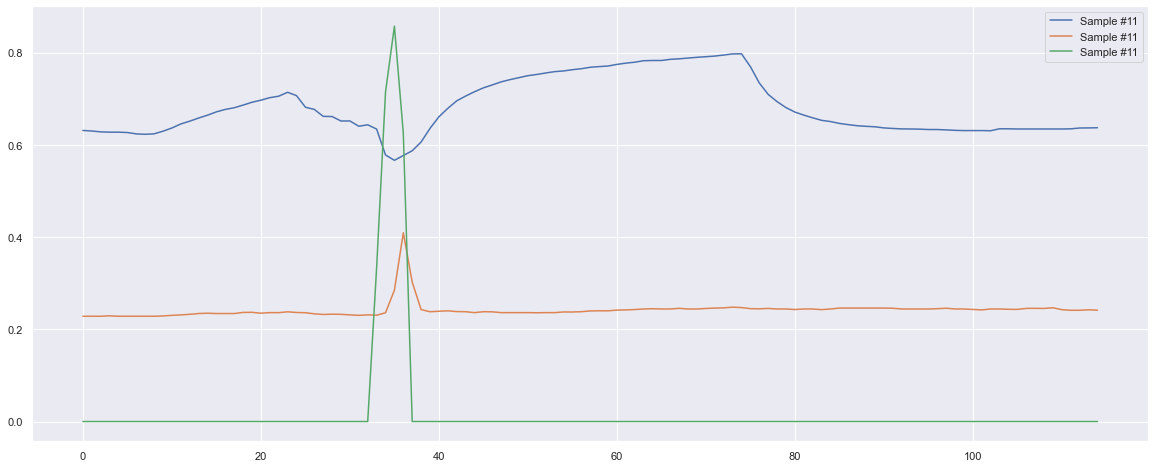

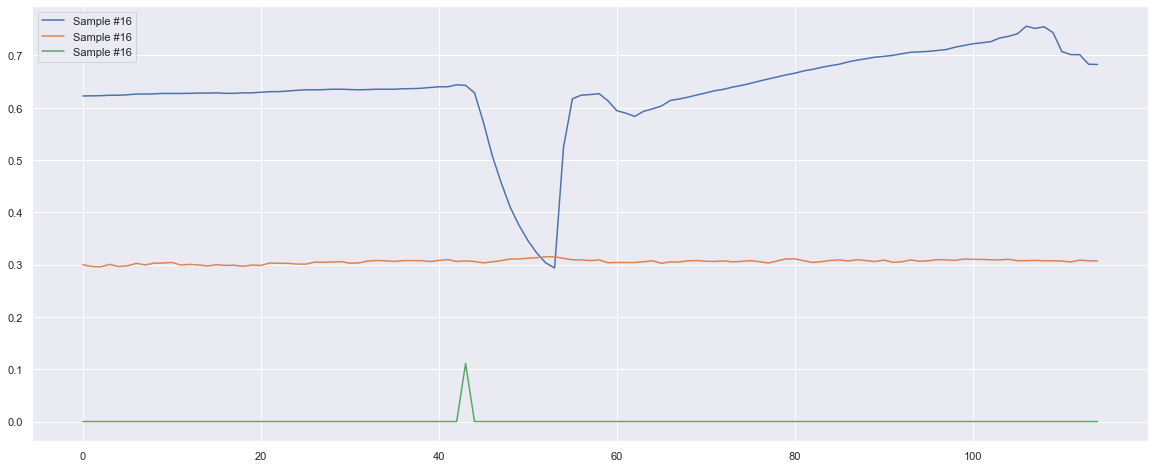

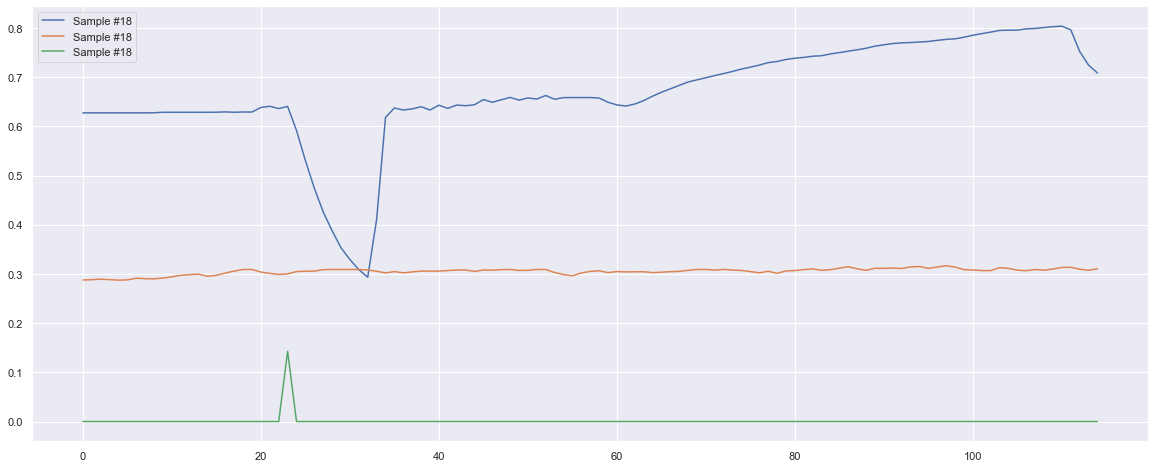

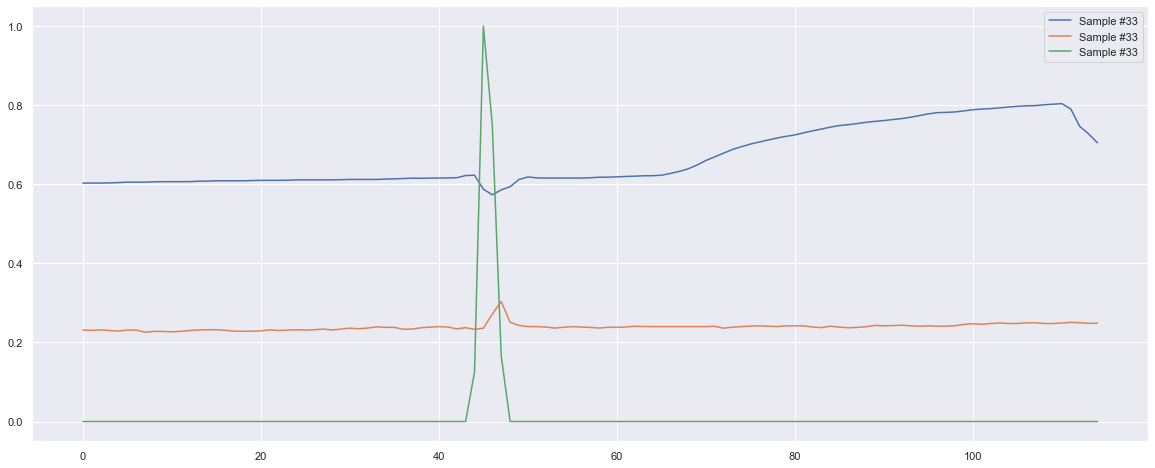

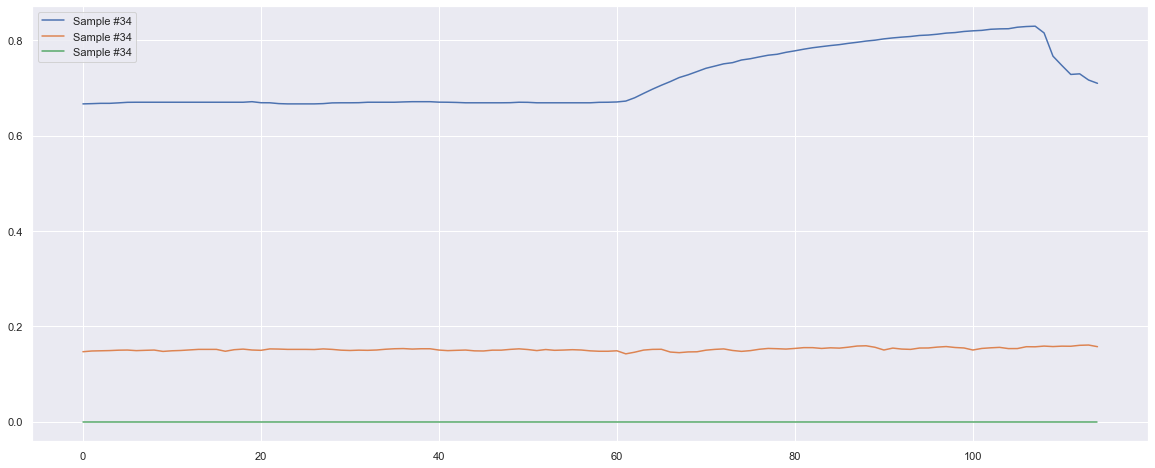

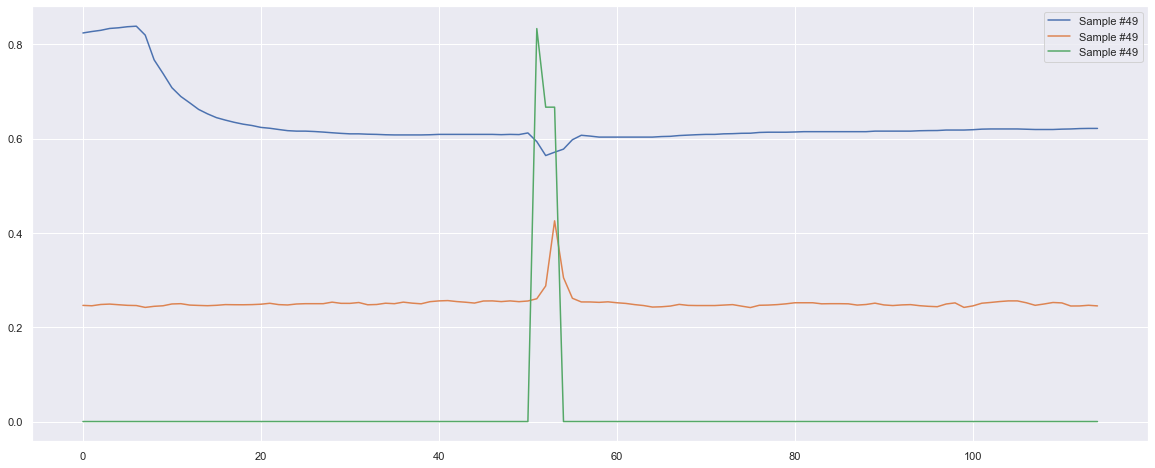

Normal samples!


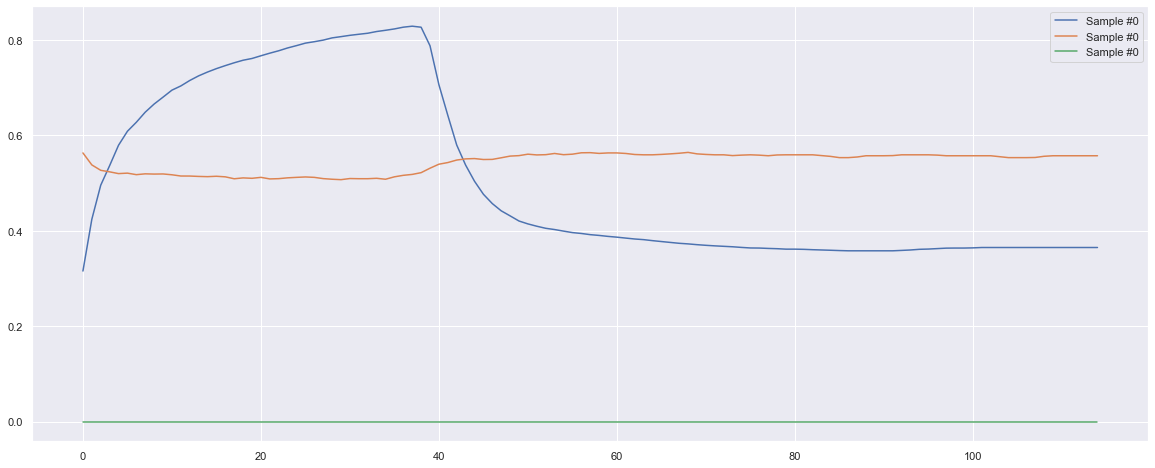

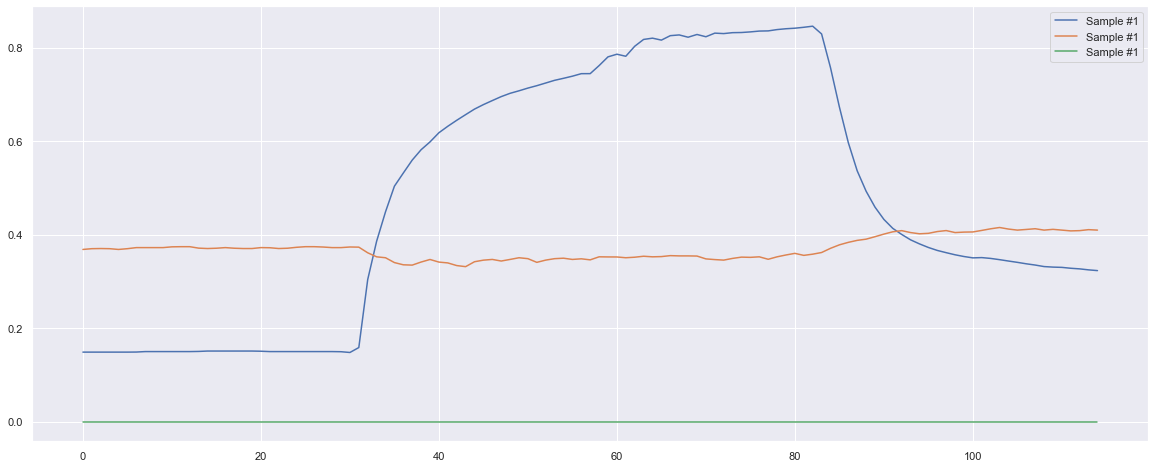

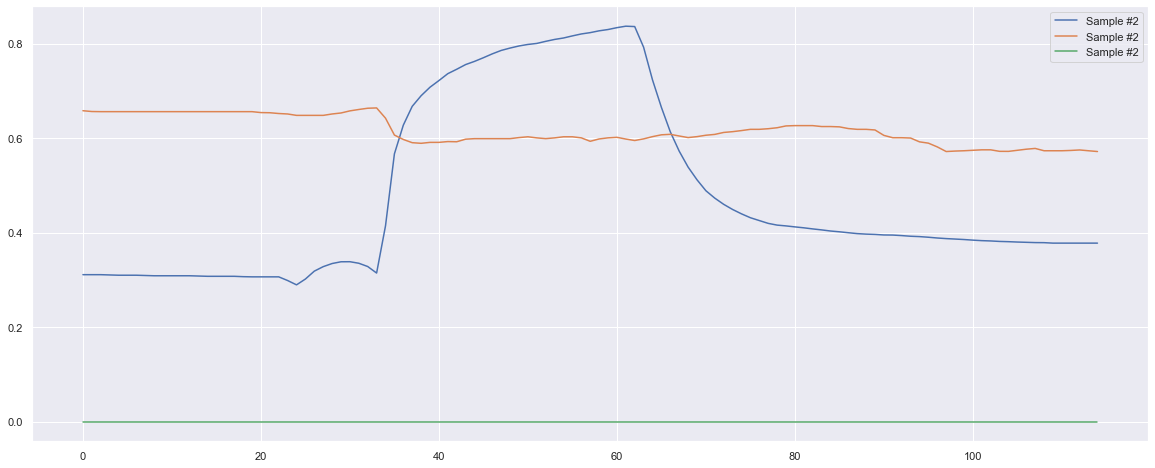

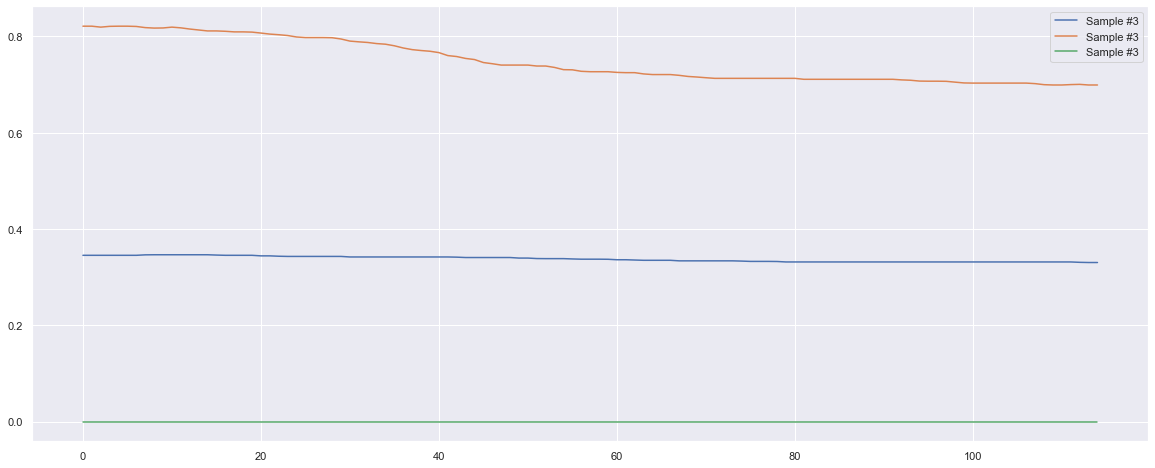

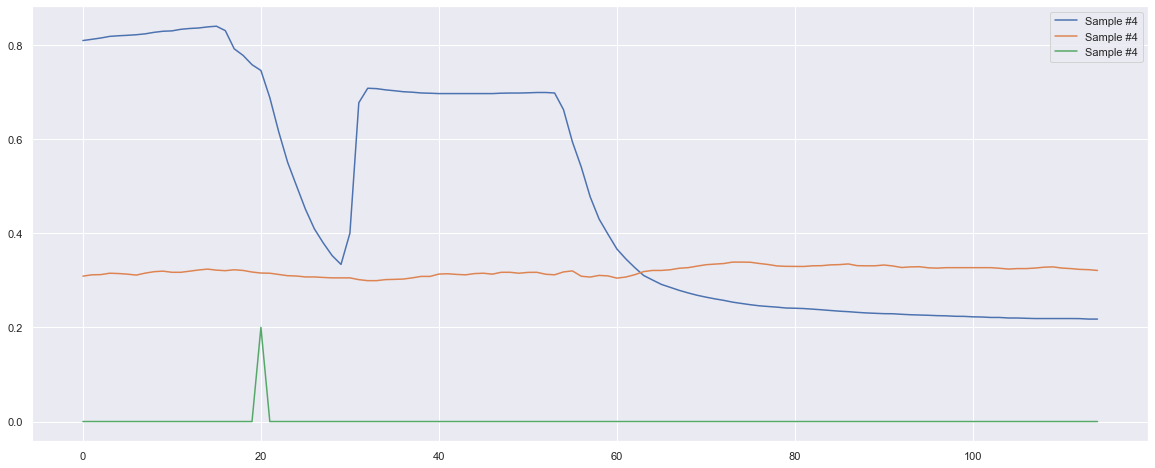

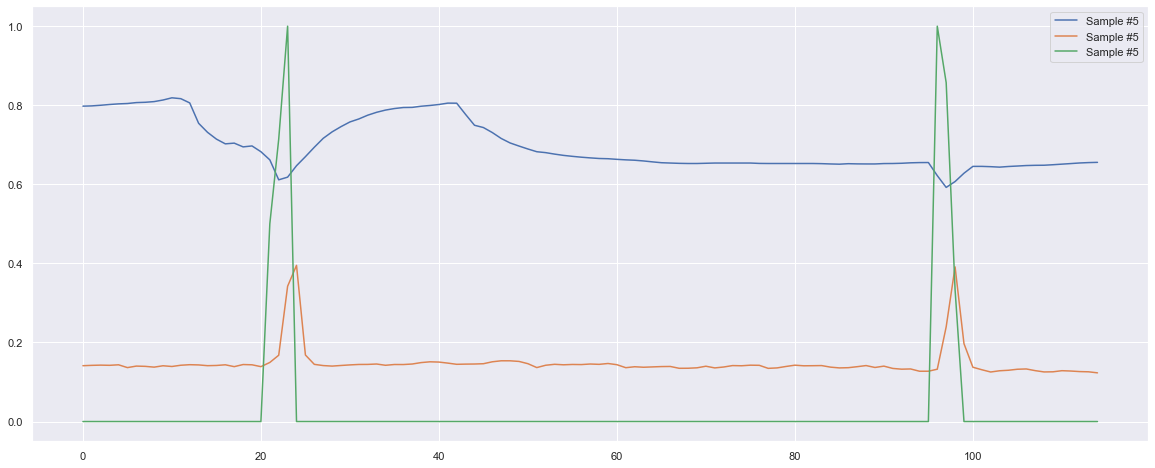

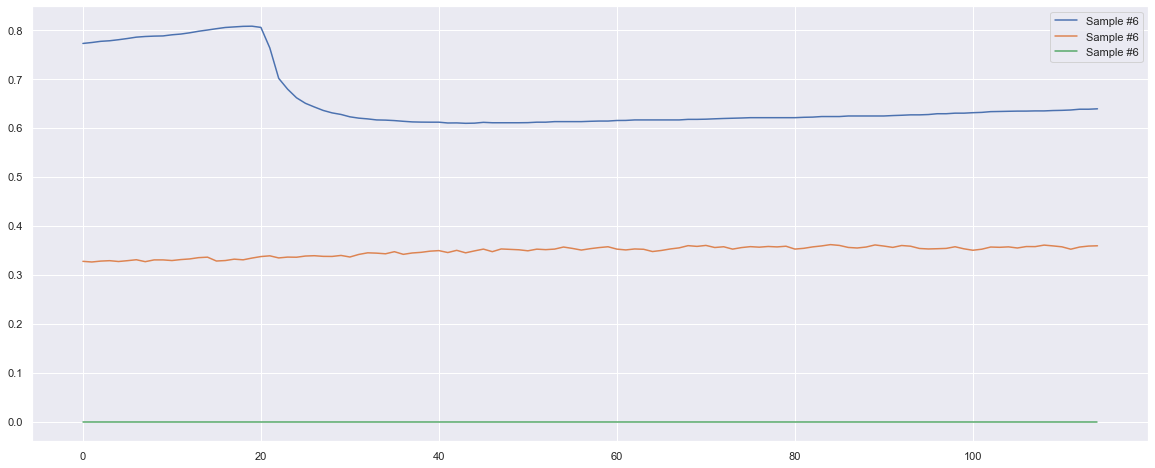

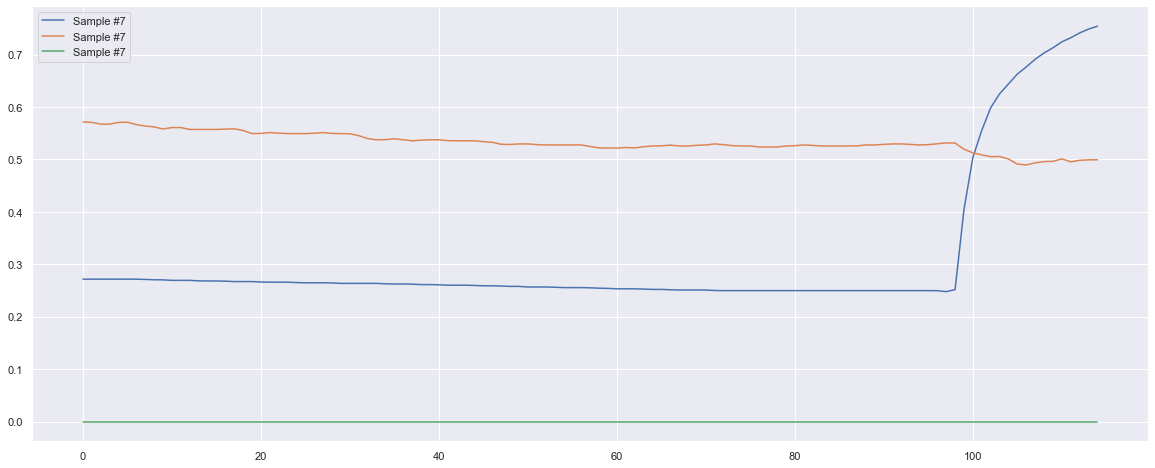

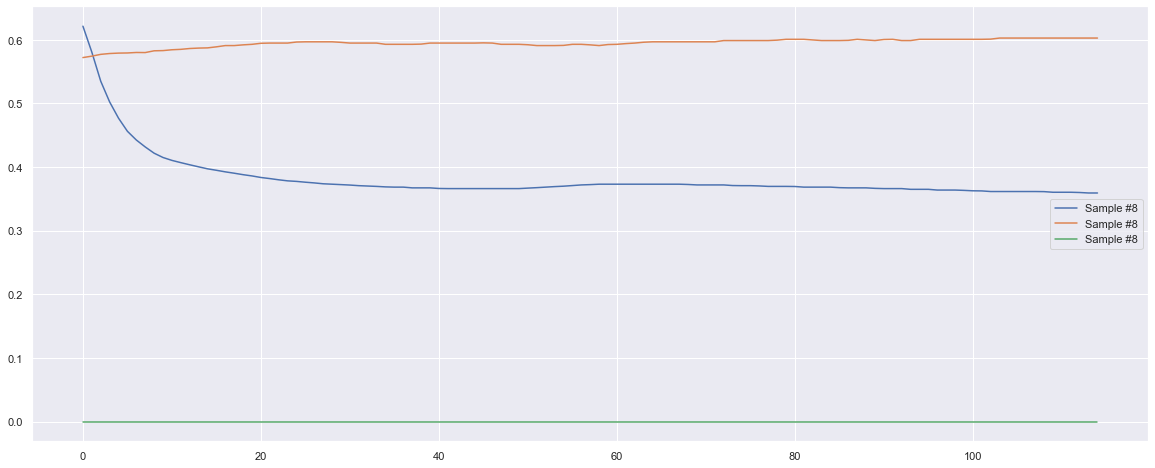

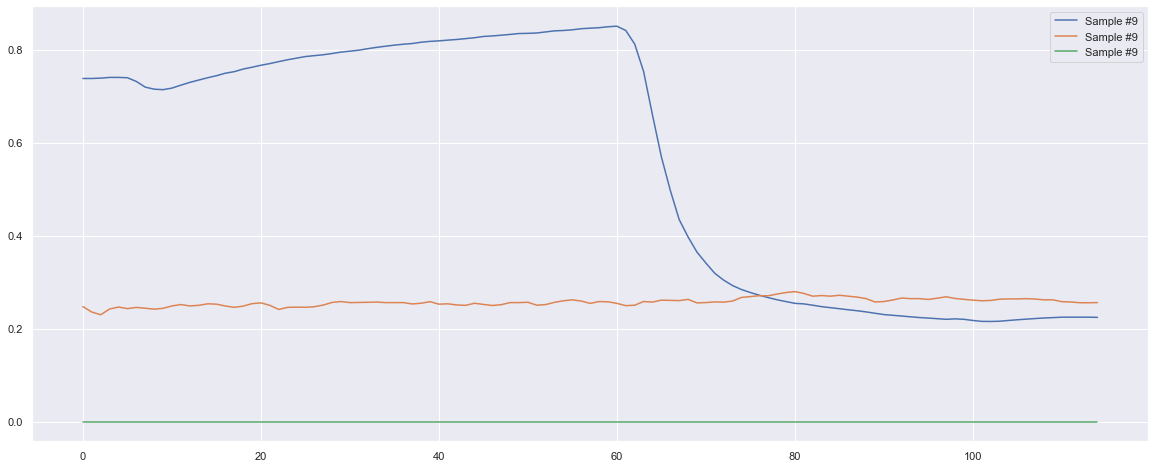

In [747]:

print("DEFROSTING samples!")

for i in range(50):
    sample = train_dataset[i]
    if sample[1][-1].item() == 1.0:
        plt.plot(sample[0], label='Sample #{}'.format(i))
        plt.legend()
        plt.show()
    

print("Normal samples!")

for i in range(10):
    sample = train_dataset[i]
    if sample[1][-1].item() == 0.0:
        plt.plot(sample[0], label='Sample #{}'.format(i))
        plt.legend()
        plt.show()


In [748]:
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=32, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)

test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                             batch_size=32, batch_sampler=None, shuffle=False,
                                             num_workers=0, drop_last=True)



In [793]:
def batch_accuracy(prediction, target):
    _, predicted = torch.max(prediction, 1)

#    print("y_pred.reshape: ", torch.reshape(y_pred, (batch_size, -1, 2)).shape)
#    y_pred = torch.reshape(y_pred, (batch_size, -1, 2))

#    print("y_pred.lastTS: ", y_pred[:, -1, :])

#    print("predicted: ", predicted)
#    print("y_test: ", y_test.shape)
#    print("y_test.reshape: ", y_test.reshape(-1))
    match = (predicted == target)
 #   print("Match: ", match)
    target_weighted = target.double()
    target_weighted[target_weighted==1] = train_weights[1] # fill in weights for label "defrosting"
    target_weighted[target_weighted==0] = train_weights[0] # fill in weights for label "normal"
#    print("y_test_weighted: ", y_test_weighted)
    match_weighted = target_weighted * match
#    print("match_weighted: ", match_weighted)
#    print("y_test_weighted.sum: ", y_test_weighted.sum())
#    print("match_weighted.sum: ", match_weighted.sum())
#    print("correct_weighted: ", (match_weighted.sum()/y_test_weighted.sum()))
#    total += (y_test.size(0) * y_test.size(1))
#    correct += match.sum().item()
    return match_weighted.sum().item(), target_weighted.sum().item()


In [749]:
class DefrostLSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=2,
                    num_layers=2):
        super(DefrostLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers, dropout = 0.2, batch_first = True)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)
#        self.m = nn.Sigmoid()
#        self.hidden = self.init_hidden()

#    def init_hidden(self):
#        # This is what we'll initialise our hidden state as
#        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
#                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).

#        print("input_len: ", len(input))

#        // random hidden layer(s)
#        h_0 = torch.randn(self.num_layers * 1, self.batch_size, self.hidden_dim)
#        c_0 = torch.randn(self.num_layers * 1, self.batch_size, self.hidden_dim)

#        lstm_out, self.hidden = self.lstm(input.reshape(25, -1, self.input_dim), (h_0, c_0))
#        print("LSTM.input: ", input.shape)

        # from batch_first to batch_middle
#        input = input.reshape(len_seq_min - len_future_min, -1, self.input_dim)
#        print("LSTM.inputReshape: ", input.shape)


#        print("INPUT: ", input)

        # Input: (seq_len, batch, input_size)
        # Syntax: output, (hidden, cell) = lstm(input, (hidden, cell) )
        lstm_out, self.hidden = self.lstm(input)

#        print("LSTM.output: ", lstm_out.shape)
#        print("LSTM.output[-1]: ", lstm_out[-1].shape)
#        print("LSTM.hidden[-1][1]: ", self.hidden[-1][1].shape)
#        print("LSTM.output[-1].view: ", lstm_out[-1].view(self.batch_size, -1).shape) # batch_middle
#        print("LSTM.output.reshape: ", lstm_out.reshape(-1, self.hidden_dim).shape) # batch_first


        # Only take the output from the final timestep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction

        # Parameter: self.linear(batch, input_size)
        # use hidden layer
#        y_pred = self.linear(self.hidden[-1][1].view(self.batch_size, -1))
        # use output layer
#        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1)) # batch_middle
        y_pred = self.linear(lstm_out.reshape(-1, self.hidden_dim)) # batch_first
        # Output: (batch, output_size)

#        print("LSTM.y_pred: ", y_pred.shape)

#        print("y_pred: ", y_pred)
#        print("y_pred.view(-1): ", y_pred.view(-1))
#        return y_pred.view(-1)
#        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))

#        y_pred = self.m(y_pred)
        return y_pred



#model.init_hidden()

In [750]:
class DefrostEncoder(nn.Module):
    def __init__(self, seq_len, n_features = 3, embedding_dim=60):
        super(DefrostEncoder, self).__init__()
        
        self.seq_len = seq_len
        self.n_features = n_features
        self.embedding_dim = embedding_dim
        self.hidden_dim = 2 * embedding_dim

        self.lstm1 = nn.LSTM(input_size=n_features, hidden_size=self.hidden_dim, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=self.hidden_dim, hidden_size=embedding_dim, num_layers=n_features, batch_first=True)

    # input: batch, seq_len, input_size
    def forward(self, input):
        print("Encoder.Input: ", input.shape)
#        input = input.reshape(self.seq_len, -1, self.n_features)
#        print("Encoder.InputReshape: ", input.shape)
        input2, (_, _) = self.lstm1(input)
        print("Encoder.Input2: ", input2.shape)

        output, (hidden_n, _) = self.lstm2(input2)
        # output: seq_len, batch, num_directions * hidden_size
        # hidden: num_layers * num_directions, batch, hidden_size

        print("Encoder.output: ", output.shape)
        print("Encoder.hidden_n: ", hidden_n.shape)

        return hidden_n.reshape((-1, self.n_features, self.embedding_dim))

#x_train:  torch.Size([32, 115, 3])
#Encoder.Input:  torch.Size([32, 115, 3])
#Encoder.Input2:  torch.Size([32, 115, 120])
#Encoder.output:  torch.Size([32, 115, 60])
#Encoder.hidden_n:  torch.Size([1, 32, 60])
#RuntimeError: shape '[-1, 3, 60]' is invalid for input of size 1920

class DefrostDecoder(nn.Module):
    def __init__(self, seq_len, input_dim=60, n_features=3):
        super(DefrostDecoder, self).__init__()

        self.seq_len = seq_len
        self.input_dim = input_dim
        self.hidden_dim = 2 * input_dim
        self.n_features = n_features

        self.lstm1 = nn.LSTM(input_size=input_dim, hidden_size=input_dim, num_layers=n_features, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=input_dim, hidden_size=self.hidden_dim, num_layers=1, batch_first=True)

        self.output_layer = nn.Linear(self.hidden_dim, n_features)

    def forward(self, input):
#        print("Decoder.Input: ", input.shape)
#        input = input.repeat(self.seq_len, self.n_features)

        print("Decoder.InputRepeat: ", input.shape)
        input = input.reshape((self.n_features, self.seq_len, self.input_dim))

        print("Decoder.InputReshape: ", input.shape)
        input2, (hidden_n, cell_n) = self.lstm1(input)
        print("Decoder.Input2: ", input2.shape)
        output, (hidden_n, cell_n) = self.lstm2(input2)
        print("Decoder.Output: ", output.shape)
        output = output.reshape((self.seq_len, self.hidden_dim))
        print("Decoder.OutputReshape: ", output.shape)
        return self.output_layer(x)

class DefrostRecurrentAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(DefrostRecurrentAutoencoder, self).__init__()
        self.encoder = DefrostEncoder(seq_len, n_features, embedding_dim)
        self.decoder = DefrostDecoder(seq_len, embedding_dim, n_features)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = DefrostRecurrentAutoencoder(len_seq_min - len_future_min, 3, 60)



# optimizer , loss
#criterion = torch.nn.MSELoss()
#criterion = torch.nn.BCEWithLogitsLoss()
criterion = nn.L1Loss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 10000

#model.init_hidden()

In [797]:
model = DefrostLSTM(input_dim = input_features, hidden_dim = 200, batch_size = 32, output_dim=2, num_layers=2)


# optimizer , loss
#criterion = torch.nn.MSELoss()
#criterion = torch.nn.BCEWithLogitsLoss()
#criterion = torch.nn.BCELoss()
criterion = torch.nn.CrossEntropyLoss(weight=torch.FloatTensor(train_weights))
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.0001, alpha = 0.99, momentum = 0.9)
epochs = 10000


#training loop

max_training_batches = 0 # 0: Unlimited

train_hist = []
test_hist = []
accuracy_hist = []

print("Model: ", model)

for i in range(epochs):

    model.train()
    running_loss = 0.0
    for j,batch in enumerate(train_dataloader):
        x_train = batch[0]
        y_train = batch[1]

        optimizer.zero_grad()

#        print("x_train: ", x_train.shape)
        y_pred = model(x_train)
#        print("y_train: ", y_train.shape)
#        print("y_pred: ", y_pred.shape)
#        print("y_train: ", torch.squeeze(y_train))
#        print("y_train.shape: ", torch.squeeze(y_train).shape)
#        print("y_pred: ", y_pred)
#        print("y_pred.shape: ", y_pred.shape)

        y_pred = y_pred.reshape(-1, 2)
#        print("y_pred2: ", y_pred.shape)
#        print("torch.reshape(y_train, (-1,)): ", torch.reshape(y_train, (-1,)).shape)
        loss = criterion(y_pred, torch.reshape(y_train, (-1,))) # criterion(input, target)

#        print("loss: ", loss)

        running_loss += loss.item() * x_train.size(0)

        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5) #  Clip exploding gradients
        optimizer.step()

        if j == max_training_batches - 1:
            break

    train_hist.append(running_loss / ((j+1)*batch_size))

#    for parameter in model.parameters():
#        print("Param: ", parameter)

    with torch.no_grad():
        model.eval()

        total = 0
        correct = 0
        running_loss = 0.0
        for j,batch in enumerate(test_dataloader):
            x_test = batch[0]
            y_test = batch[1]

            y_pred = model(x_test)

#            loss = criterion(y_pred, y_test.squeeze())
            loss = criterion(y_pred, torch.reshape(y_test, (-1,))) # criterion(input, target)
#            loss = criterion(y_pred, torch.squeeze(y_test))

            match_weighted, target_weighted = batch_accuracy(y_pred.data, y_test.reshape(-1))
            total += target_weighted
            correct += match_weighted

            running_loss += loss.item() * x_test.size(0)

#            if (j<3) | (j>(len(test_dataloader)-3)):
#                print("batch: ", j, "   Shape: ", x_train.shape, "    LOSS: ", loss.item(), " * ", x_train.size(0), "   running_loss: ", running_loss)

#            if j > 5:
#                break
        test_hist.append(running_loss / ((j+1)*batch_size))
        accuracy_hist.append(correct / total)

    if i%1 == 0:
        print(i,"th iteration: Train: ",train_hist[i], " / ", test_hist[i], " / ", accuracy_hist[i])


Model:  DefrostLSTM(
  (lstm): LSTM(3, 200, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=200, out_features=2, bias=True)
)
0 th iteration: Train:  0.49657137870788576  /  0.4297470450401306  /  0.8686368278646075
1 th iteration: Train:  0.3857614493370056  /  0.37402495245138806  /  0.8686368278646075
2 th iteration: Train:  0.3570923364162445  /  0.3986271421114604  /  0.8686368278646075
3 th iteration: Train:  0.3430760967731476  /  0.31731774906317395  /  0.8706062226825881
4 th iteration: Train:  0.322987043261528  /  0.30910136302312213  /  0.8733016616730963
5 th iteration: Train:  0.30894759595394133  /  0.30181892464558285  /  0.8792649044767885
6 th iteration: Train:  0.2906399542093277  /  0.276297186811765  /  0.8893006500515492
7 th iteration: Train:  0.27907156467437744  /  0.2647758771975835  /  0.8941754316332607
8 th iteration: Train:  0.26249896109104154  /  0.2549395387371381  /  0.8821902574552637
9 th iteration: Train:  0.2608021324872

KeyboardInterrupt: 

In [662]:
torch.save(model.state_dict(), './defrost_lstm_full_0.09235202987480351.pt')


In [796]:

total = 0
correct = 0

model.eval()
for j,batch in enumerate(test_dataloader):
    x_test = batch[0]
    y_test = batch[1]

    y_pred = model(x_test)
#    print(x_test)
#    print("y_test: ", y_test)
#    print("y_pred: ", y_pred)
#    print("torch.reshape(y_test, (-1,)): ", torch.reshape(y_test, (-1,)))
#    print("torch.reshape(y_test, (-1,)).shape: ", torch.reshape(y_test, (-1,)).shape)

    loss = criterion(y_pred, torch.reshape(y_test, (-1,)))
#    print("y_pred.data: ", y_pred.data.shape)
    

#    _, predicted = torch.max(y_pred.data, 1)
#
##    print("y_pred.reshape: ", torch.reshape(y_pred, (batch_size, -1, 2)).shape)
##    y_pred = torch.reshape(y_pred, (batch_size, -1, 2))
#
##    print("y_pred.lastTS: ", y_pred[:, -1, :])
#
##    print("predicted: ", predicted)
##    print("y_test: ", y_test.shape)
##    print("y_test.reshape: ", y_test.reshape(-1))
#    match = (predicted == y_test.reshape(-1))
# #   print("Match: ", match)
#    y_test_weighted = y_test.reshape(-1).double()
#    y_test_weighted[y_test_weighted==1] = train_weights[1] # fill in weights for label "defrosting"
#    y_test_weighted[y_test_weighted==0] = train_weights[0] # fill in weights for label "normal"
##    print("y_test_weighted: ", y_test_weighted)
#    match_weighted = y_test_weighted * match
##    print("match_weighted: ", match_weighted)
#    print("y_test_weighted.sum: ", y_test_weighted.sum())
#    print("match_weighted.sum: ", match_weighted.sum())
#    print("batch_accuracy: ", batch_accuracy(y_pred.data, y_test.reshape(-1)))
##    print("correct_weighted: ", (match_weighted.sum()/y_test_weighted.sum()))
##    total += (y_test.size(0) * y_test.size(1))
##    correct += match.sum().item()
    match_weighted, target_weighted = batch_accuracy(y_pred.data, y_test.reshape(-1))
    total += target_weighted
    correct += match_weighted

#    total += y_test_weighted.sum().item()
#    correct += match_weighted.sum().item()
#    print("Loss: ", loss)
#    print("Correct: ", correct)
#    print("Total: ", total)
    if j > 50:
        break
print('Accuracy: %d %%' % (100 * correct / total))

#    if j == max_training_batches - 1:
#        break
#inp.size(0)
#

Accuracy: 92 %


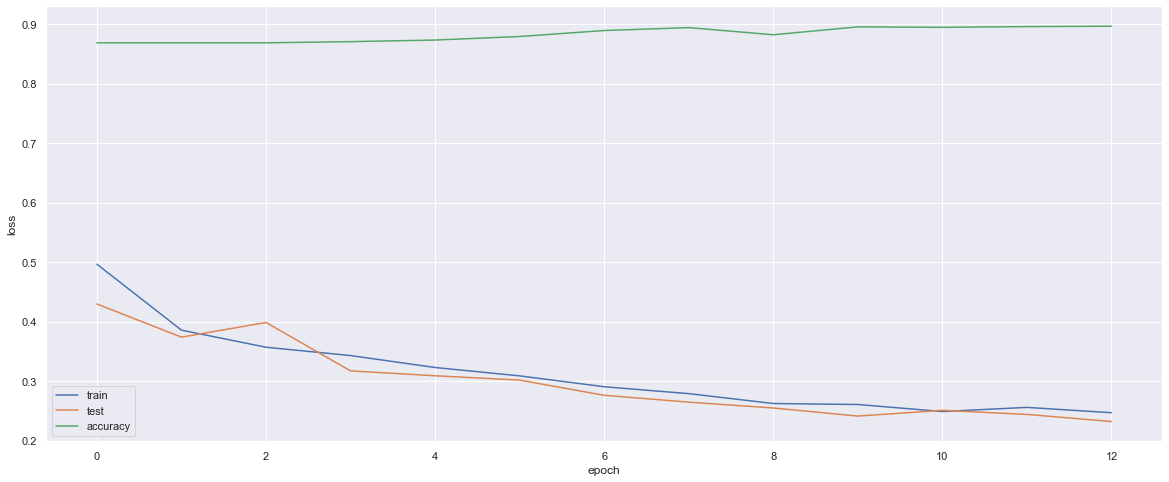

In [798]:
#plt.plot(np.linspace(1, i, i), train_hist[:i], label='train')
#plt.plot(np.linspace(1, i, i), test_hist[:i], label='test')
plt.plot(train_hist, label='train')
plt.plot(test_hist, label='test')
plt.plot(accuracy_hist, label='accuracy')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [284]:
i

662

In [347]:
test_m = nn.Sigmoid()
test_loss = nn.BCELoss()
test_input = torch.randn(3, requires_grad=True)
test_target = torch.empty(3).random_(2)
test_output = test_loss(test_m(test_input), test_target)
test_output.backward()


In [348]:
test_target

tensor([0., 1., 0.])

In [ ]:
class trainer:
    def __init__(self,loss_fn,model,optimizer,scheduler,epochs):
        self.loss_fn = loss_fn
        self.model = model
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.config = config

        
    def batch_train(self, batch_imgs, batch_labels0,batch_labels1, batch_idx):
        batch_imgs, batch_labels0,batch_labels1 = batch_imgs.cuda().float(), batch_labels0.cuda().float(),batch_labels1.cuda().float()
        predicted = self.model(batch_imgs)
        loss1 = self.loss_fn(predicted[0].float().reshape(-1), batch_labels0.reshape(-1))
        loss2 = self.loss_fn(predicted[1].float().reshape(-1), batch_labels1.reshape(-1))
        loss = loss1+loss2
        loss = loss/2.0
        loss.backward()
        self.optimizer.step()
        self.optimizer.zero_grad()
        return loss.item(), predicted
    
    def batch_valid(self, batch_imgs,get_fet):
        self.model.eval()
        batch_imgs = batch_imgs.cuda()
        with torch.no_grad():
            predicted = self.model(batch_imgs)
            predicted[0] = torch.sigmoid(predicted[0])
            predicted[1] = torch.sigmoid(predicted[1])
        return predicted
    
    def train_epoch(self, loader):
        self.model.train()
        tqdm_loader = tqdm(loader)
        current_loss_mean = 0
        for batch_idx, (imgs,labels,labels1) in enumerate(tqdm_loader):
            loss, predicted = self.batch_train(imgs[0], labels,labels1, batch_idx)
            current_loss_mean = (current_loss_mean * batch_idx + loss) / (batch_idx + 1)
            tqdm_loader.set_description('loss: {:.4} lr:{:.6}'.format(
                    current_loss_mean, self.optimizer.param_groups[0]['lr']))
            self.scheduler.step(batch_idx)
            if batch_idx>10:
                break
        return current_loss_mean
    
    def valid_epoch(self, loader,name="valid"):
        self.model.eval()
        tqdm_loader = tqdm(loader)
        current_loss_mean = 0
        correct = 0
        for batch_idx, (imgs,labels0,labels1) in enumerate(tqdm_loader):
            with torch.no_grad():
                batch_imgs = imgs.cuda().float()[0]
                batch_labels0 = labels0.cuda().float()
                batch_labels1 = labels1.cuda().float()
                predicted = self.model(batch_imgs)
                loss0 = self.loss_fn(predicted[0].float().reshape(-1),batch_labels0.float().reshape(-1)).item()
                loss1 = self.loss_fn(predicted[1].float().reshape(-1),batch_labels1.float().reshape(-1)).item()
                loss = loss0 + loss1
                loss = loss/2.0
                current_loss_mean = (current_loss_mean * batch_idx + loss) / (batch_idx + 1)
                tqdm_loader.set_description(f"loss : {current_loss_mean:.4}")
            if batch_idx>10:
                break
        score = 1-current_loss_mean
        print('metric {}'.format(score))
        return score
    
    def run(self, train_dataloader, test_dataloader):
        best_score = -100000
        for e in range(self.config.epochs):
            print("----------Epoch {}-----------".format(e))
            current_loss_mean = self.train_epoch(train_loder)
            score = self.valid_epoch(val_loder)
            if best_score < score:
                best_score = score
                torch.save(self.model.state_dict(),self.config.MODEL_PATH+"/{}_best.pth".format(self.config.model_name))

    def batch_valid_tta(self, batch_imgs):
        batch_imgs = batch_imgs.cuda()
        predicted = model(batch_imgs)
        tta_flip = [[-1],[-2]]
        for axis in tta_flip:
            predicted += torch.flip(model(torch.flip(batch_imgs, axis)), axis)
        predicted = predicted/(1+len(tta_flip))
        predicted = torch.sigmoid(predicted)
        return predicted.cpu().numpy()
            
    def load_best_model(self):
        if os.path.exists(self.config.MODEL_PATH+"/{}_best.pth".format(self.config.model_name)):
            self.model.load_state_dict(torch.load(self.config.MODEL_PATH+"/{}_best.pth".format(self.config.model_name)))
            print("load best model")
        
    def predict(self,imgs_tensor,get_fet = False):
        self.model.eval()
        with torch.no_grad():
            return self.batch_valid(imgs_tensor,get_fet=get_fet)

In [241]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(30, 20)
        self.lrelu1 = nn.LeakyReLU()
        self.lin2 = nn.Linear(20, 9)
        self.lrelu2 = nn.LeakyReLU()
        self.act = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.lin1(x)
        x = self.lrelu1(x)
        x = self.lin2(x)
        x = self.lrelu2(x)
        x = x.reshape(3, 3)
        return self.act(x)
            

model = SimpleModel()            
x = torch.randn(1, 30)
y = torch.tensor([[1., 0., 0.],
                  [0., 1., 0.],
                  [0., 0., 1.]])

#criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
epochs = 40000

loss_history = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss_history.append(loss)
    loss.backward()
    optimizer.step()
    print(epoch, ': Loss: {:.3f}'.format(loss.item()))
    
print("target: {}".format(y))
print("output: {}".format(output))

plt.plot(np.linspace(1, epochs, epochs), loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


20249 : Loss: 0.002
20250 : Loss: 0.002
20251 : Loss: 0.002
20252 : Loss: 0.002
20253 : Loss: 0.002
20254 : Loss: 0.002
20255 : Loss: 0.002
20256 : Loss: 0.002
20257 : Loss: 0.002
20258 : Loss: 0.002
20259 : Loss: 0.002
20260 : Loss: 0.002
20261 : Loss: 0.002
20262 : Loss: 0.002
20263 : Loss: 0.002
20264 : Loss: 0.002
20265 : Loss: 0.002
20266 : Loss: 0.002
20267 : Loss: 0.002
20268 : Loss: 0.002
20269 : Loss: 0.002
20270 : Loss: 0.002
20271 : Loss: 0.002
20272 : Loss: 0.002
20273 : Loss: 0.002
20274 : Loss: 0.002
20275 : Loss: 0.002
20276 : Loss: 0.002
20277 : Loss: 0.002
20278 : Loss: 0.002
20279 : Loss: 0.002
20280 : Loss: 0.002
20281 : Loss: 0.002
20282 : Loss: 0.002
20283 : Loss: 0.002
20284 : Loss: 0.002
20285 : Loss: 0.002
20286 : Loss: 0.002
20287 : Loss: 0.002
20288 : Loss: 0.002
20289 : Loss: 0.002
20290 : Loss: 0.002
20291 : Loss: 0.002
20292 : Loss: 0.002
20293 : Loss: 0.002
20294 : Loss: 0.002
20295 : Loss: 0.002
20296 : Loss: 0.002
20297 : Loss: 0.002
20298 : Loss: 0.002

KeyboardInterrupt: 

In [ ]:
display(normalized_df)
normalized_df.index.array[-1]
#normalized_df.iat[0,0]

In [17]:
### KANN ERSTMAL IGNORIERT WERDEN!!

def extract_window(df, time1, time2):
    #window = df[(df.index >= time1) & (df.index <= time2)].sparse.to_dense()
    window = df[time1 : time2].sparse.to_dense()
    idx_window = df.index.get_loc(window.iloc[0].name)
    for column in df.columns:
#        print("### First Val: {}".format(window[column].iloc[0]))
        if pd.isna(window[column].iloc[0]):
            for i in range(idx_window, -1, -1):
                lastValue = df[column].iloc[i]

                if not pd.isna(lastValue):
#                    print("### lastValue {}".format(lastValue))
                    break;
            window[column].iloc[0] = lastValue
    return window

win = extract_window(merged_df, '2020-12-10 12:00:00', '2020-12-10 15:00:00')
display(win)

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:08,10.6,25.6,40.0,29.9,43.0,40.9,29.8,57.5,2.1,29.3,3727.0,0,0,1,0,1
2020-12-10 12:00:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:28,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.4,NaN,0,0,1,0,1
2020-12-10 12:00:38,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:48,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:59:27,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:08,10.6,25.6,40.0,29.9,43.0,40.9,29.8,57.5,2.1,29.3,3727.0,0,0,1,0,1
2020-12-10 12:00:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:28,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,29.4,NaN,0,0,1,0,1
2020-12-10 12:00:38,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1
2020-12-10 12:00:48,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:59:27,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
2020-12-10 14:59:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,starts_compressor1,compressor_heating,defrosting,heatpump_heating,heatpump_servicewater,heatpump_running
time,,,,,,,,,,,,,,,,
2020-12-10 12:00:00,10.566667,25.600000,40.0,29.950000,43.0,40.900000,29.8,57.500000,2.066667,29.366667,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:01:00,10.600000,25.716667,40.0,30.016667,43.0,40.900000,29.8,57.583333,2.116667,29.500000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:02:00,10.600000,25.800000,40.0,30.080000,43.0,40.900000,29.8,57.640000,2.340000,29.580000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:03:00,10.566667,25.883333,40.0,30.233333,43.0,40.900000,29.8,57.700000,2.500000,29.650000,3727.0,0.0,0.0,1.000000,0.0,1.000000
2020-12-10 12:04:00,10.600000,25.957143,40.0,30.257143,43.0,40.900000,29.8,57.700000,2.500000,29.771429,3727.0,0.0,0.0,0.857143,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-10 14:55:00,10.600000,24.857143,15.0,24.085714,43.0,43.100000,42.2,21.028571,5.900000,25.500000,3727.0,0.0,0.0,0.000000,0.0,0.000000
2020-12-10 14:56:00,10.600000,24.400000,15.0,24.300000,43.0,43.100000,42.2,21.116667,5.833333,24.916667,3727.0,0.0,0.0,0.000000,0.0,0.000000
2020-12-10 14:57:00,10.600000,24.300000,15.0,24.185714,43.0,43.100000,42.2,20.914286,5.800000,24.628571,3727.0,0.0,0.0,0.000000,0.0,0.000000


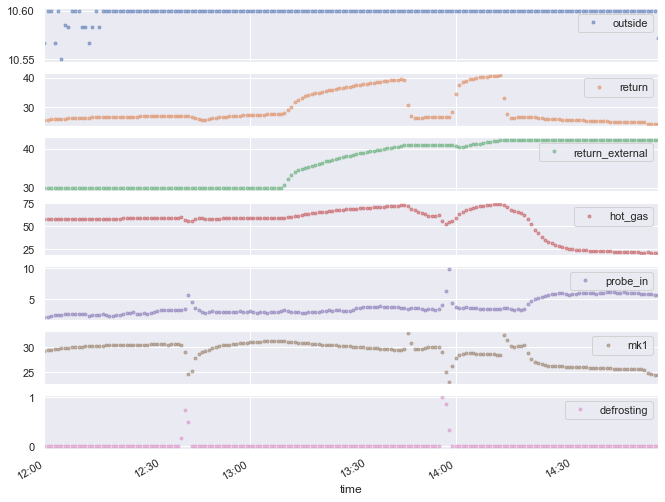

In [19]:
#merged_df.resample('1Min').mean()
display(win)
# todo: How to resample boolean columns to boolean?
win_resampled = win.ffill().resample('1Min').mean()
display(win_resampled)

sns.set(rc={'figure.figsize':(20, 8)})

cols_plot = ['outside', 'return', 'return_external', 'hot_gas', 'probe_in', 'mk1', 'defrosting']
axes = win_resampled[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


In [5]:
df_night = merged_df[merged_df.index.hour == 22]
print(df_night.groupby(by=[df_night.index.week])['hot_gas'].mean())
print(df_night.groupby(by=[df_night.index.week])['compressor_heating'].sum())



time
1     14.433574
2     15.800000
3     14.075399
4     15.525028
5     17.141829
6     14.537316
7     15.548469
8     15.317804
9     15.924297
10    16.616212
11    16.805267
12    17.097427
13    18.615747
14    19.477051
15    20.537031
16    20.374599
17    20.067411
18    21.521059
19    23.241848
20    22.583965
21    26.299360
22    26.805753
23    25.746602
24    26.052708
25    27.751928
26    28.099902
27    28.113965
28    27.284555
29    28.818042
30    29.028017
31    28.782789
32    27.727880
33    27.712985
34    27.895511
35    27.132382
36    24.837901
37    24.407562
38    23.862086
39    23.326798
40    20.134608
41    21.702313
42    20.926358
43    19.357206
44    18.276557
45    17.362019
46    17.124287
47    17.672892
48    14.656778
49    18.794903
50    17.470110
51    17.442094
52    16.304890
Name: hot_gas, dtype: float64
time
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8     16
9      0
10     0
11    10
12     0
13    18
14    29
15

In [61]:
df_defrosting = merged_df[merged_df['defrosting']==True]
#df_defrosting.groupby(by=[df_defrosting.index.month, df_defrosting.index.year])['defrosting'].sum()
df_defrosting.groupby(by=[df_defrosting.index.month])['hot_gas'].mean()

NotImplementedError: Sparse[float64, nan] dtype not supported

In [21]:
df_plot = merged_df[(merged_df.index > '2020-12-10 12:00:00') & (merged_df.index < '2020-12-10 15:00:00')]

In [16]:
df_plot

,outside,return,reference_return,supply,servicewater_reference,servicewater,return_external,hot_gas,probe_in,mk1,mk1_reference,starts_compressor1,state,extended_state,compressor_heating,defrosting,heatpump_running,heatpump_heating,heatpump_servicewater
time,,,,,,,,,,,,,,,,,,,
2020-12-20 12:00:03,12.4,27.8,39.7,33.0,44.0,40.0,28.6,58.1,10.6,32.2,0.0,3737,Heatpump running: 01:03:26,heating: 01:03:17,False,False,True,True,False
2020-12-20 12:01:23,12.3,27.9,39.7,33.0,44.0,40.0,28.6,58.1,10.7,32.3,0.0,3737,Heatpump running: 01:04:46,heating: 01:04:46,False,False,True,True,False
2020-12-20 12:01:34,12.4,27.9,39.7,33.1,44.0,40.0,28.6,58.1,10.7,32.3,0.0,3737,Heatpump running: 01:04:55,heating: 01:04:55,False,False,True,True,False
2020-12-20 12:04:05,12.3,28.0,39.7,33.2,44.0,40.0,28.6,58.1,10.8,32.4,0.0,3737,Heatpump running: 01:07:26,heating: 01:07:26,False,False,True,True,False
2020-12-20 12:04:15,12.4,28.0,39.7,33.2,44.0,40.0,28.6,58.1,10.7,32.4,0.0,3737,Heatpump running: 01:07:36,heating: 01:07:26,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-20 14:31:45,12.2,39.8,39.7,45.5,44.0,42.0,41.2,71.0,11.3,26.8,0.0,3738,Heatpump running: 00:57:05,service water: 00:57:05,False,False,True,False,True
2020-12-20 14:57:02,12.3,29.0,39.7,34.3,44.0,44.1,43.0,60.6,11.0,33.3,0.0,3738,Heatpump running: 01:22:11,heating: 01:22:11,False,False,True,True,False
2020-12-20 14:57:12,12.2,29.1,39.7,34.3,44.0,44.1,43.0,60.6,11.0,33.4,0.0,3738,Heatpump running: 01:22:21,heating: 01:22:21,False,False,True,True,False


In [61]:
left = pd.DataFrame({"a": [1, 5, 10], "left_val": ["a", "b", "c"]})
left.set_index('a', inplace=True)
display(left)
right = pd.DataFrame({"a": [1, 2, 3, 6, 7], "right_val": [1, 2, 3, 6, 7]})
right.set_index('a', inplace=True)
display(right)
#display(pd.merge_asof(left, right, on="a", allow_exact_matches=False))
dfm = left.merge(right, how='outer', left_index=True, right_index=True, )
dfm
# tolerance = 10)

,left_val
a,
1,a
5,b
10,c


,right_val
a,
1,1
2,2
3,3
6,6
7,7


,right_val
a,
1,1
2,2
3,3
6,6
7,7


In [59]:
rng = pd.date_range("2014-1-1", periods=100, freq="D") + pd.Timedelta("1s")
ts = pd.Series(range(100), index=rng)
ts.resample("3T").sum()
#ts

2014-01-01 00:00:00     0
2014-01-01 00:03:00     0
2014-01-01 00:06:00     0
2014-01-01 00:09:00     0
2014-01-01 00:12:00     0
                       ..
2014-04-09 23:48:00     0
2014-04-09 23:51:00     0
2014-04-09 23:54:00     0
2014-04-09 23:57:00     0
2014-04-10 00:00:00    99
Freq: 3T, Length: 47521, dtype: int64